In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data, removing leading and trailing spaces and dropping duplicates
df = pd.read_csv('/Users/sarahnguyen/Downloads/music.csv').iloc[:,1:]
df.columns = df.columns.str.strip()
df = df.drop_duplicates()

# Drop rows where genres are based on language and not audio features
language_genres = ['british','french','german','swedish','spanish','indian','malay','turkish','world-music', 'iranian']
df = df.drop(df[df['track_genre'].isin(language_genres)].index)

# Convert booleans to integers
df['explicit'] = df['explicit'].astype(int)

df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.90500,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111995,3TpcGANz2N705Bq4zc982H,Roots Manuva,Run Come Save Me,Trim Body,17,215720,1,0.798,0.6840,2,-5.138,1,0.1680,0.03070,0.000159,0.4790,0.557,94.936,4,trip-hop
111996,57qWtXga1hMwSfkhLDJCKQ,Everything But The Girl,Worldwide (Deluxe Edition),My Head Is My Only House Unless It Rains - 201...,18,178586,0,0.590,0.1200,5,-12.451,1,0.0374,0.89900,0.000023,0.1090,0.369,107.099,4,trip-hop
111997,0xcDUsknTawAv5VZKQ62aZ,Wax Tailor,Dusty Rainbow from the Dark,From The Dark,17,202960,0,0.460,0.2920,11,-11.922,1,0.0281,0.37300,0.229000,0.1700,0.357,158.906,3,trip-hop
111998,7LVOum3l1HrbitK9AoUPd7,Cibo Matto,Hotel Valentine,Emerald Tuesday,17,199893,0,0.554,0.8980,0,-7.642,1,0.0474,0.00732,0.833000,0.4780,0.853,113.289,1,trip-hop


In [2]:
from sklearn.preprocessing import MinMaxScaler

# Scale numeric audio features
numeric_features = ['popularity','duration_ms','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
scaler = MinMaxScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,0.044043,0,0.686294,0.4610,1,0.791392,0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,0.028566,0,0.426396,0.1660,1,0.597377,1,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,0.040255,0,0.444670,0.3590,0,0.736123,1,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,0.038557,0,0.270051,0.0596,0,0.573701,1,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,0.037969,0,0.627411,0.4430,2,0.737103,1,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111995,3TpcGANz2N705Bq4zc982H,Roots Manuva,Run Come Save Me,Trim Body,0.17,0.041189,1,0.810152,0.6840,2,0.821135,1,0.174093,0.030823,0.000159,0.4790,0.559799,0.390086,4,trip-hop
111996,57qWtXga1hMwSfkhLDJCKQ,Everything But The Girl,Worldwide (Deluxe Edition),My Head Is My Only House Unless It Rains - 201...,0.18,0.034099,0,0.598985,0.1200,5,0.685866,1,0.038756,0.902610,0.000023,0.1090,0.370854,0.440063,4,trip-hop
111997,0xcDUsknTawAv5VZKQ62aZ,Wax Tailor,Dusty Rainbow from the Dark,From The Dark,0.17,0.038753,0,0.467005,0.2920,11,0.695651,1,0.029119,0.374498,0.229000,0.1700,0.358794,0.652935,3,trip-hop
111998,7LVOum3l1HrbitK9AoUPd7,Cibo Matto,Hotel Valentine,Emerald Tuesday,0.17,0.038167,0,0.562437,0.8980,0,0.774818,1,0.049119,0.007349,0.833000,0.4780,0.857286,0.465497,1,trip-hop


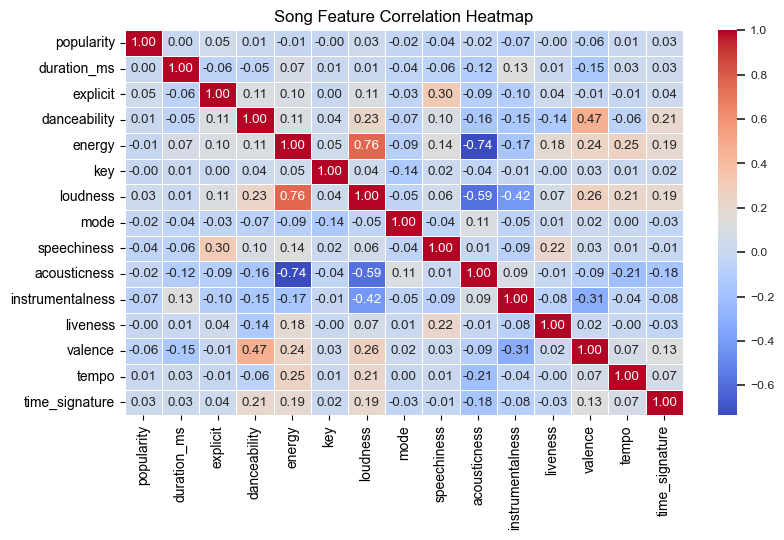

In [3]:
# Build numeric dataframe to analyze correlation between song features
numeric_df = numeric_df = df.select_dtypes(include='number')

# Visualization
plt.figure(figsize=(9, 5))
plt.title("Song Feature Correlation Heatmap")
sns.set_theme(font_scale=0.8)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, linewidths=.5, cmap='coolwarm', fmt=".2f")
plt.show()

In [4]:
# Create a dataframe with the average values of each feature for each genre
average_df = df.groupby('track_genre')[numeric_df.columns].mean().reset_index()
average_df

,track_genre,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,acoustic,0.424830,0.041032,0.052000,0.557962,0.435368,5.045000,0.741416,0.816000,0.044816,0.569093,0.038336,0.153244,0.426154,0.489007,3.885000
1,afrobeat,0.244074,0.047437,0.018018,0.679602,0.702938,5.556557,0.772088,0.510511,0.089763,0.271981,0.252876,0.184724,0.701985,0.489958,3.945946
2,alt-rock,0.338969,0.044939,0.056056,0.542742,0.754027,5.732733,0.801602,0.640641,0.057073,0.122659,0.054151,0.210340,0.520783,0.512197,3.938939
3,alternative,0.243614,0.042395,0.164164,0.568490,0.719848,5.570571,0.803781,0.605606,0.072678,0.148561,0.037501,0.201441,0.497646,0.502144,3.941942
4,ambient,0.442082,0.045300,0.005005,0.373569,0.237257,4.949950,0.572198,0.619620,0.043060,0.779820,0.675993,0.129298,0.168185,0.456735,3.653654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,synth-pop,0.365760,0.046743,0.044000,0.630115,0.713135,4.952000,0.764411,0.612000,0.050090,0.152934,0.082324,0.184169,0.589324,0.504783,3.979000
100,tango,0.198710,0.034917,0.000000,0.546053,0.372828,4.925000,0.730049,0.480000,0.082732,0.849607,0.139715,0.230348,0.586462,0.470696,3.814000
101,techno,0.390420,0.059632,0.026000,0.694770,0.746413,5.515000,0.766756,0.556000,0.066540,0.081741,0.540038,0.159434,0.323496,0.526994,3.967000
102,trance,0.376366,0.051329,0.022022,0.592182,0.845386,5.715716,0.799133,0.483483,0.082634,0.036046,0.423381,0.234480,0.278276,0.547668,3.956957


In [5]:
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity

# Initialize empty graph
knowledge_graph = nx.Graph()

# Add genre nodes to the graph
for _, row in average_df.iterrows():
    genre = row['track_genre']
    features = row.drop('track_genre').to_dict()  # Extract audio features as a dictionary
    knowledge_graph.add_node(genre, **features)  # Add node with genre name and features

print("Nodes:", knowledge_graph.nodes())

Nodes: ['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'funk', 'garage', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indie', 'indie-pop', 'industrial', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb', 'new-age', 'opera', 'pagode', 'party', 'piano', 'pop', 'pop-film', 'power-pop', 'progressive-house', 'psych-rock', 'punk', 'punk-rock', 'r-n-b', 'reggae', 'reggaeton', 'rock', 'rock-n-roll', 'rockabilly', 'romance', 'sad', 'salsa

In [6]:
from sklearn.cluster import KMeans

# Extract the feature matrix (excluding genre)
feature_matrix = average_df.drop(columns=['track_genre','popularity','duration_ms', 'explicit', 'mode']).values

# Compute cosine similarity between all pairs of genres
similarity_matrix = cosine_similarity(feature_matrix)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=73)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(feature_matrix)
average_df['cluster'] = clusters

# Add edges between genres in the same cluster (intra-cluster connections)
threshold_intra_cluster = 0.8  # Higher threshold for intra-cluster connections
for i, genre1 in enumerate(average_df['track_genre']):
    for j, genre2 in enumerate(average_df['track_genre']):
        if i < j and clusters[i] == clusters[j] and similarity_matrix[i, j] > threshold_intra_cluster:
            knowledge_graph.add_edge(genre1, genre2, weight=similarity_matrix[i, j])

# Add edges between genres in different clusters (cross-cluster connections)
threshold_cross_cluster = 0.7  # Lower threshold for cross-cluster connections
for i, genre1 in enumerate(average_df['track_genre']):
    for j, genre2 in enumerate(average_df['track_genre']):
        if i < j and clusters[i] != clusters[j] and similarity_matrix[i, j] > threshold_cross_cluster:
            knowledge_graph.add_edge(genre1, genre2, weight=similarity_matrix[i, j])

print("Edges:", knowledge_graph.edges(data=True))

Edges: [('acoustic', 'comedy', {'weight': np.float64(0.988273311248941)}), ('acoustic', 'honky-tonk', {'weight': np.float64(0.9990618371319494)}), ('acoustic', 'opera', {'weight': np.float64(0.9971528044839207)}), ('acoustic', 'romance', {'weight': np.float64(0.9976651038874675)}), ('acoustic', 'show-tunes', {'weight': np.float64(0.9996880495405547)}), ('acoustic', 'tango', {'weight': np.float64(0.9983595611476141)}), ('acoustic', 'afrobeat', {'weight': np.float64(0.9963611922968106)}), ('acoustic', 'alt-rock', {'weight': np.float64(0.9952615906316374)}), ('acoustic', 'alternative', {'weight': np.float64(0.9963197791273724)}), ('acoustic', 'ambient', {'weight': np.float64(0.9921957864325026)}), ('acoustic', 'anime', {'weight': np.float64(0.9975093206582785)}), ('acoustic', 'black-metal', {'weight': np.float64(0.9904965684738705)}), ('acoustic', 'bluegrass', {'weight': np.float64(0.99856414640734)}), ('acoustic', 'blues', {'weight': np.float64(0.9982844063947771)}), ('acoustic', 'brazil

In [8]:
def recommend_cross_genre_song(current_genre, next_genre, num_recs=5):
    # Get songs from the current genre
    current_songs = df[df['track_genre'] == current_genre]
    if current_songs.empty:
        print(f"No songs found for genre: {current_genre}")
        return pd.DataFrame()  # Return an empty DataFrame
    
    # Get songs from the next genre
    next_songs = df[df['track_genre'] == next_genre]
    if next_songs.empty:
        print(f"No songs found for genre: {next_genre}")
        return pd.DataFrame()  # Return an empty DataFrame
    
    # Compute cosine similarity between songs in the current genre and next genre
    current_features = current_songs[numeric_df.columns].values
    next_features = next_songs[numeric_df.columns].values
    similarities = cosine_similarity(current_features, next_features)
    
    # Get the most similar songs
    top_songs = similarities.argsort(axis=1)[:, -num_recs:][:, ::-1]
    recommendations = next_songs.iloc[top_songs.flatten()].drop_duplicates()
    
    return recommendations

In [9]:
def generate_transition_playlist(start_genre, target_genre, path, num_recs=5):
    transition_playlist = []
    
    for i in range(len(path) - 1):
        current_genre = path[i]
        next_genre = path[i + 1]
        
        # Recommend songs from the next genre that are similar to the current genre
        recommendations = recommend_cross_genre_song(current_genre, next_genre, num_recs=num_recs)
        
        # Check if recommendations are not empty
        if not recommendations.empty:
            transition_playlist.extend(recommendations.to_dict('records'))
        else:
            print(f"No recommendations found for transition: {current_genre} → {next_genre}")
    
    return pd.DataFrame(transition_playlist)  # Convert list of dicts back to DataFrame

/var/folders/rk/lsd6tc2s7011lvtldd7qksmh0000gn/T/ipykernel_79177/2990170306.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('Pastel1', len(set(clusters)))


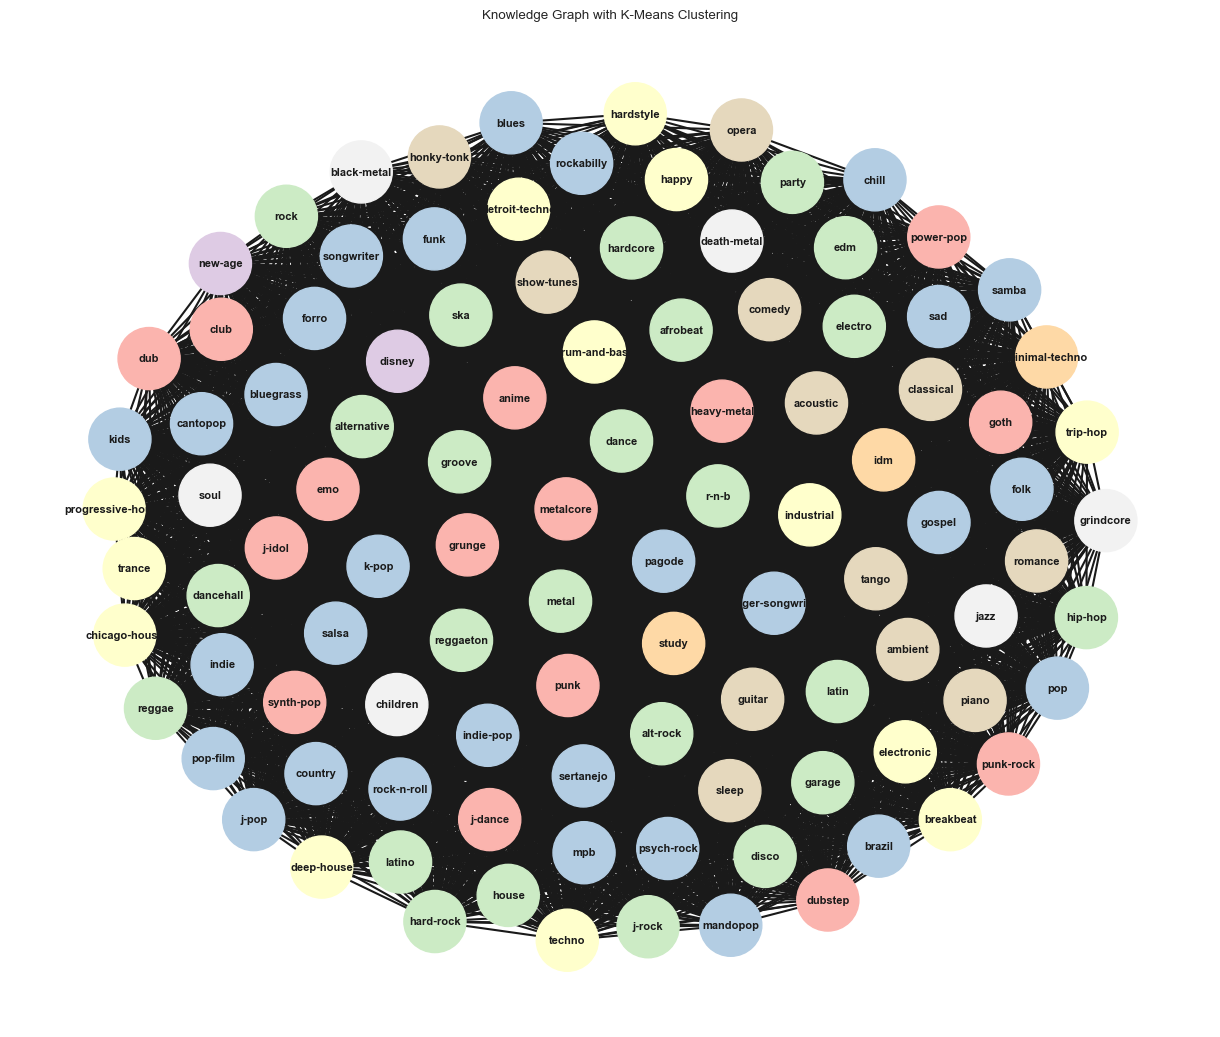

In [10]:
import matplotlib.cm as cm
colormap = cm.get_cmap('Pastel1', len(set(clusters)))
node_colors = [colormap(cluster) for cluster in clusters]

pos = nx.spring_layout(knowledge_graph, k=1, iterations=100, seed=73)  # Increase k for better spacing

plt.figure(figsize=(12, 10))
nx.draw(knowledge_graph, pos, with_labels=True, node_size=2000, node_color=node_colors, font_size=8, font_weight='bold', width=1.5)
plt.title("Knowledge Graph with K-Means Clustering")
plt.show()

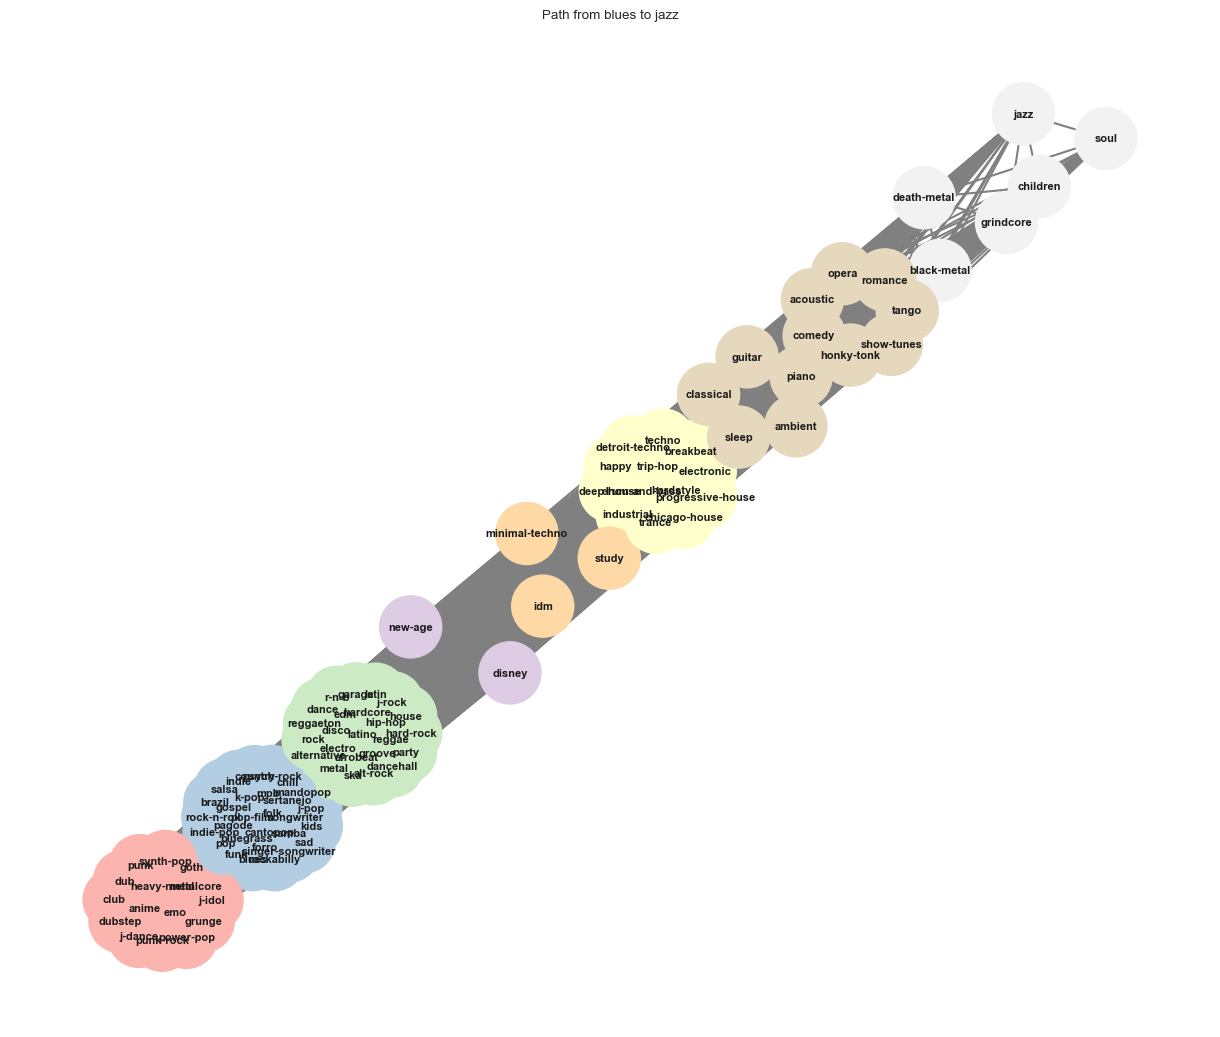

In [11]:
from networkx.drawing.layout import spring_layout

# Create a dictionary mapping nodes to their cluster
cluster_mapping = dict(zip(average_df['track_genre'], clusters))

# Assign nodes to positions based on their cluster
pos = {}
for cluster_id in set(clusters):
    # Get nodes in the current cluster
    nodes_in_cluster = [node for node in knowledge_graph.nodes if cluster_mapping[node] == cluster_id]
    
    # Create a subgraph for the current cluster
    subgraph = knowledge_graph.subgraph(nodes_in_cluster)
    
    # Compute positions for the subgraph
    subgraph_pos = spring_layout(subgraph, k=1, iterations=100, seed=73)
    
    # Offset positions to separate clusters
    offset = cluster_id * 2  # Adjust offset to prevent overlap
    for node, (x, y) in subgraph_pos.items():
        pos[node] = (x + offset, y + offset)

# Draw the graph
plt.figure(figsize=(12, 10))
nx.draw(knowledge_graph, pos, with_labels=True, node_size=2000, node_color=node_colors, font_size=8, font_weight='bold', edge_color='grey', width=1.5)
plt.title(f"Path from {start_genre} to {target_genre}")
plt.show()

In [12]:
start_genre = 'blues'
target_genre = 'jazz'
try:
    shortest_path = nx.shortest_path(knowledge_graph, source=start_genre, target=target_genre, weight='weight')
    print(f"Shortest path from {start_genre} to {target_genre}: {shortest_path}")
    
    transition_playlist = generate_transition_playlist(start_genre, target_genre, shortest_path, num_recs=5)
    if not transition_playlist.empty:
        print("Transition Playlist:")
        print(transition_playlist[['track_id', 'track_genre']])
    else:
        print("No transition playlist generated.")
except nx.NetworkXNoPath:
    print(f"No path found from {start_genre} to {target_genre}.")

Shortest path from blues to jazz: ['blues', 'jazz']
Transition Playlist:
                   track_id track_genre
0    4T6HLdP6OcAtqC6tGnQelG        jazz
1    0S4HB769BP3gdVWfe7SLtS        jazz
2    2C6l8EGcbfcLXu0mWfAadB        jazz
3    5uq57c53VeLYlZd2byrIwT        jazz
4    1TAC5SANfK7l6wGHtUQ7MX        jazz
..                      ...         ...
606  0KAiWkzEGqxjZqXDT0IwIz        jazz
607  7jYZ5YItwaAZUyWBmBOSRa        jazz
608  6SvIO9X1alZpKyG3g8EAHB        jazz
609  5HDBWCdgIWgEUE8qHfEvlg        jazz
610  0mHKNruyEQ4NgVpnqov5wv        jazz

[611 rows x 2 columns]
